# CHAPTER.05 회귀

## 03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

간단한 회귀식인 y = 4X + 6을 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사 하강법을 이용해 회귀계수 𝑤₁,𝑤₀을 도출해보자

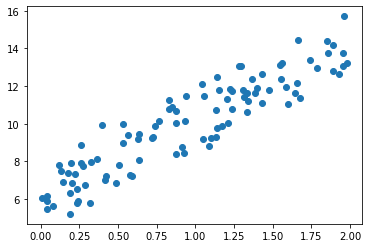

In [1]:
# 단순 선형 회귀로 예측할 만한 데이터 세트 먼저 만들기

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(𝑤₁=4,𝑤₀=6), 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 6 + 4* X + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

- .rand() : 0부터 1사이의 균일한 확률 분포로 실수 난수를 생성
- .randn() : 기댓값이 0이고 표준편차가 1인 가우시안 표준 정규 분포를 따르는 난수를 생성

In [8]:
# 비용함수(RSS) 정의

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)) / N
    return cost

In [5]:
# 경사 하강법을 함수를 생성해 구현하기
# w1과 w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 w1과 w0을 업데이트한다.

# w1과 w0를 업데이트할 w1_update, w0_update를 반환
# X와 y는 위에서 무작위로 생성한 값. 둘다 넘파이 ndarray이다.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 에측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 초렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

- numpy.dot : numpy array를 곱할 때 사용한다.
- numpy.ndarray.T : 2차원 행렬 전치

In [7]:
# get_weight_updates()를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0을 업데이트하는 함수 만들기

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용한다.
def gradient_descent_steps(X, y, iters=10000):
    # w0과 w1를 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates()호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [9]:
# w1, w0 값 구하고 get_cost() 함수를 이용해 경사 하강법의 예측 오류 계산하기

w1, w0 = gradient_descent_steps(X, y, iters=10000)
print("w1: {0:.3f} w0: {1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1: 3.968 w0: 6.222
Gradient Descent Total Cost: 0.9924


실제 선형식인 y = 4X + 6과 유사하게 w1은 3.968, w0은 6.222가 도출되었다. 예측 오류 비용은 약 0.9924이다.

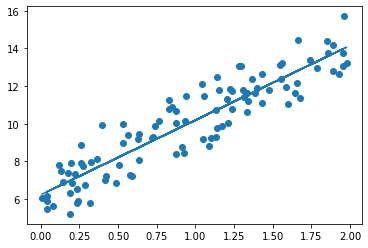

In [12]:
# 앞에서 구한 y_pred에 기반해 회귀선 그리기
plt.scatter(X, y)
plt.plot(X, y_pred)

일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행시간이 매우 오래 걸린다는 단점이 있다.

그때문에 실전에서는 대부분 **확률적 경사 하강법(Stochastic Gradint Descent)**를 이용한다. 
- 전체 입력 데이터로 w가 업데이트 되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트 되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장한다.
    - 따라서 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출한다.

In [16]:
# (미니 배치) 확률적 경사 하강법 함수로 구현하기
"""
앞에서 생성한 gradient_descent_steps()와 크게 다르지 않다.
다만 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해, 
이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이가 있다.
"""

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000) :
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤(permutation()이용)하게 batch_size 만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 bath_size만큼 추출된 데이ㅓ 기반으로 w1_update, w0_date 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [17]:
# w1, w0 및 예측 오류 비용 계산

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=10000)
print("w1: ", round(w1[0, 0], 3), "w0: ", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y, y_pred)))

w1:  3.988 w0:  6.244
Stochastic Gradient Descent Total Cost: 0.9942


(미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며, 예측 오류 비용 또한 0.9924로 경사 하강법으로 구한 예측 오류 비용 0.9942보다 아주 조금 높을 뿐으로 큰 예측 성능상의 차이가 없음을 알 수 있다. 따라서 큰 데이터를 처리할 경우에는 경사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용한다.

**피처가 여러 개인 경우, 회귀 계수 도출하기**
- 피처가 여러개인 경우도 1개인 경우를 확장해 유사하게 도출할 수 있다.
- 피처가 M개 있다면 그에 따른 회귀 계수도 M + 1(1개는 w0)개로 도출된다.
- 회귀 계수가 많아지더라도 선형대수를 이용해 간단하게 예측값을 도출할 수 있다.
- 데이터의 개수가 N이고 피처 M개의 입력 행렬을 Xmat, 회귀 계수 w1, w2 ... w100을 W 배열로 표기하면 예측 행렬 Ŷ = np.dot(Xmat, W) + w0로 구할 수 있다.

## 04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
### LinearRegression 클래스 - Ordinary Least Squares

### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
LinearRegression 클래스를 이용해 선형 회귀 모델 만들기

In [20]:
# 해당 데이터 세트를 로드하고 데이터프레임으로 변경하기

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 세트 로드
boston = load_boston()

# boston 데이터 세트 데이터프레임 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 데이터프레임에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기 : ', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


데이터 세트 피처의 Null값은 없으며 모두 float형이다.

- seaborn의 regplot() : X, Y축 값의 산점도와 함께 선형 회귀 직선을 그려준다.
- matplotlib.subplots() : 여러개의 그래프를 한번에 표현하기 위해 자주 사용
    - 인자
        - ncols : 열 방향으로 위치할 그래프의 개수
        - nrows : 행 방향으로 위치할 그래프의 개수

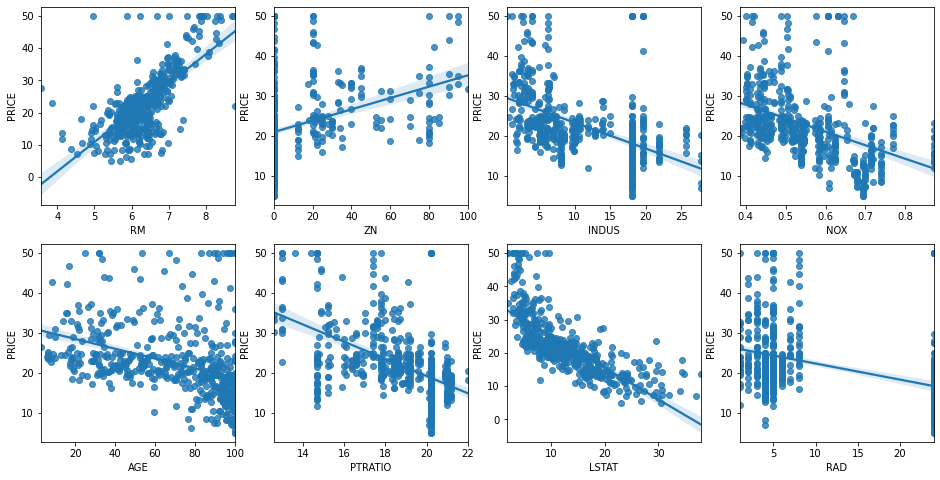

In [23]:
# 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화하여 알아보기
# 8개의 칼럼에 대해 값이 증가할수록 PRICE값이 어떻게 변하는지 확인

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐
# 각 ax마다 칼럼과 PRICE의 관계를 표현
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현s
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다.

RM(방 개수)는 양방향의 선형성(Positive Linearity)이 가장 크다. 즉, 방의 크기가 클수록 가격이 증가하는 것을 확연히 보여준다. LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 크다. LSTAT이 적을수록 PRICE가 증가하는 모습이 확연히 나타난다.

In [26]:
# LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델 만들기

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3,
                                                   random_state=156)

# 선형 회귀로 OLS 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.4f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.1590
Variance score: 0.757


In [27]:
# LinearRegression으로 생성한 주택가격 모델의 inercept(절편)과 coefficients(회귀 계수)값 구하기

print('절편 값: ', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

절편 값:  40.995595172164336
회귀 계수값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [28]:
# coef_ 속성은 회귀 계수 값만 가지고 있다.
# 따라서 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값순으로 출력

# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의 !
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [31]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829
